In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [2]:

# Directory paths
train_dir = r'D:\thesis\train'
val_dir = r'D:\thesis\validate'
test_dir = r'D:\thesis\test'

In [4]:
# Load and preprocess data
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(224, 224), batch_size=16, class_mode='categorical')
validation_generator = val_datagen.flow_from_directory(
    val_dir, target_size=(224, 224), batch_size=16, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(224, 224), batch_size=16, class_mode='categorical')

Found 4277 images belonging to 334 classes.
Found 992 images belonging to 334 classes.
Found 1017 images belonging to 334 classes.


In [5]:
# Build the model
base_model = DenseNet121(
    weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)



29084464/29084464 [==============================] - 41s 1us/step


In [7]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/50
268/268 [==============================] - 140s 472ms/step - loss: 5.1246 - accuracy: 0.1078 - val_loss: 3.9293 - val_accuracy: 0.2520
Epoch 2/50
268/268 [==============================] - 122s 457ms/step - loss: 2.1557 - accuracy: 0.6724 - val_loss: 1.2050 - val_accuracy: 0.7974
Epoch 3/50
268/268 [==============================] - 120s 448ms/step - loss: 0.4933 - accuracy: 0.9776 - val_loss: 0.4512 - val_accuracy: 0.9425
Epoch 4/50
268/268 [==============================] - 115s 428ms/step - loss: 0.1188 - accuracy: 0.9981 - val_loss: 0.2947 - val_accuracy: 0.9546
Epoch 5/50
268/268 [==============================] - 120s 446ms/step - loss: 0.0505 - accuracy: 0.9998 - val_loss: 0.2181 - val_accuracy: 0.9637
Epoch 6/50
268/268 [==============================] - 121s 452ms/step - loss: 0.0268 - accuracy: 1.0000 - val_loss: 0.1996 - val_accuracy: 0.9647
Epoch 7/50
268/268 [==============================] - 122s 456ms/step - loss: 0.0166 - accuracy: 1.0000 - val_loss: 0.1635 -

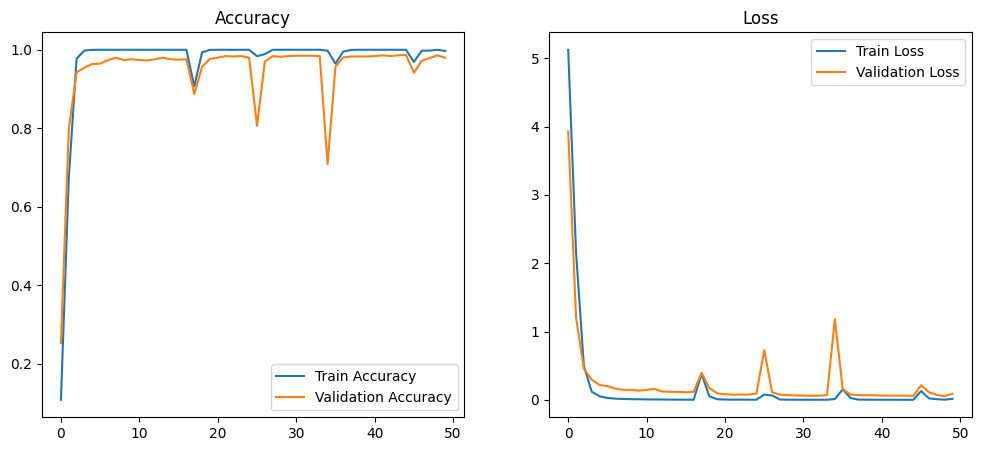

In [8]:
# Train the model
history = model.fit(train_generator, epochs=50,
                    validation_data=validation_generator)

model.save('my_densenet121.h5')

# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {accuracy*100:.2f}%')

# Plot results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.show()

In [9]:
val_accuracy = history.history['val_accuracy'][-1]
print(f"Validation Accuracy: {val_accuracy}")

Validation Accuracy: 0.9798387289047241


In [10]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [12]:
import numpy as np
from sklearn.metrics import classification_report

# Calculate the correct number of steps
test_steps = np.ceil(test_generator.n / test_generator.batch_size)

# Make predictions on the test set
test_generator.reset()  # Resetting generator to avoid shuffling
predictions = model.predict(test_generator, steps=test_steps)
predicted_classes = np.argmax(predictions, axis=1)

# Get actual class labels
# Note: Adjust this if your test_generator doesn't include all samples in the last batch
true_classes = test_generator.classes[:len(predicted_classes)]

# Calculate and print classification report
report = classification_report(
    true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)

64/64 [==============================] - 8s 128ms/step
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         3
         100       0.00      0.00      0.00         3
         101       0.00      0.00      0.00         3
         102       0.00      0.00      0.00         4
         103       0.00      0.00      0.00         3
         104       0.00      0.00      0.00         3
         105       0.00      0.00      0.00         3
         106       0.00      0.00      0.00         3
         107       0.00      0.00      0.00         3
         108       0.00      0.00      0.00         3
         109       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         3
         110       0.00      0.00      0.00         4
         111       0.00      0.00      0.00         4
         112       0.00      0.00      0.00         3
         113       0.00   

In [13]:
# Print a few predictions
for i in range(10):
    print(f"Predicted: {predicted_classes[i]}, Actual: {true_classes[i]}")

Predicted: 274, Actual: 0
Predicted: 24, Actual: 0
Predicted: 145, Actual: 0
Predicted: 128, Actual: 1
Predicted: 246, Actual: 1
Predicted: 177, Actual: 1
Predicted: 35, Actual: 2
Predicted: 329, Actual: 2
Predicted: 38, Actual: 2
Predicted: 0, Actual: 3


In [15]:
import numpy as np

# Assuming test_generator and model are already defined and set up
test_generator.reset()  # Reset the generator to ensure we're starting from the beginning

# Get a batch of samples
x, y = next(test_generator)

# Make predictions
predictions = model.predict(x)
predicted_classes = np.argmax(predictions, axis=1)

# Get the corresponding actual labels
actual_classes = np.argmax(y, axis=1)

# Print out the actual and predicted labels for the first 10 samples
for i in range(10):
    print(f"Sample {i+1}: Actual Class - {actual_classes[i]}, Predicted Class - {predicted_classes[i]}")

1/1 [==============================] - 1s 1s/step
Sample 1: Actual Class - 281, Predicted Class - 281
Sample 2: Actual Class - 143, Predicted Class - 143
Sample 3: Actual Class - 8, Predicted Class - 8
Sample 4: Actual Class - 47, Predicted Class - 47
Sample 5: Actual Class - 323, Predicted Class - 323
Sample 6: Actual Class - 47, Predicted Class - 47
Sample 7: Actual Class - 46, Predicted Class - 46
Sample 8: Actual Class - 18, Predicted Class - 18
Sample 9: Actual Class - 88, Predicted Class - 88
Sample 10: Actual Class - 198, Predicted Class - 198


In [16]:
import numpy as np
from sklearn.metrics import f1_score, classification_report

# Assuming test_generator and model are already defined and set up
test_generator.reset()  # Reset the generator
test_steps = np.ceil(test_generator.n / test_generator.batch_size)

# Make predictions
predictions = model.predict(test_generator, steps=test_steps)
predicted_classes = np.argmax(predictions, axis=1)

# Get actual class labels
true_classes = test_generator.classes
true_classes = true_classes[:len(predicted_classes)]  # Adjust if necessary

# Calculate F1 score
f1 = f1_score(true_classes, predicted_classes, average='weighted')
print(f"F1 Score: {f1}")

# Optional: Print full classification report
report = classification_report(
    true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)

64/64 [==============================] - 8s 127ms/step
F1 Score: 0.0029498525073746312
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         3
         100       0.00      0.00      0.00         3
         101       0.00      0.00      0.00         3
         102       0.00      0.00      0.00         4
         103       0.00      0.00      0.00         3
         104       0.00      0.00      0.00         3
         105       0.00      0.00      0.00         3
         106       0.00      0.00      0.00         3
         107       0.00      0.00      0.00         3
         108       0.00      0.00      0.00         3
         109       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         3
         110       0.00      0.00      0.00         4
         111       0.00      0.00      0.00         4
         112       0.00      0.00      0.00     